In [1]:
import spacy
import pandas as pd
from collections import Counter
from itertools import chain
import spacy
from spacy import displacy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, download

In [74]:
nlp = spacy.load("en_core_web_sm")

In [2]:
df_train = pd.read_csv("dataset/df_processado_completo.csv")
X = df_train['text_processed_spacy'].copy()
y = df_train['sentiment_cate'].to_numpy()

##### Exibe alguns conceitos linguisticos das frases

In [76]:
def categorias(text):    
    doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
    df = pd.DataFrame(columns = ['Text', 'Lemma', 'Pos','Dep','Is Stop'])
    for token in doc:
        df=df.append({'Text' : str(token.text) , 'Lemma' : str(token.lemma_), 'Pos' : str(token.pos_),'Dep' : str(token.dep_),'Is Stop' : str(token.is_stop)},ignore_index=True)
    return df

In [77]:
categorias("Apple is looking at buying U.K. startup for $1 billion")

,Text,Lemma,Pos,Dep,Is Stop
0,Apple,Apple,PROPN,nsubj,False
1,is,be,AUX,aux,True
2,looking,look,VERB,ROOT,False
3,at,at,ADP,prep,True
4,buying,buy,VERB,pcomp,False
5,U.K.,U.K.,PROPN,dobj,False
6,startup,startup,NOUN,advcl,False
7,for,for,ADP,prep,True
8,$,$,SYM,quantmod,False
9,1,1,NUM,compound,False


##### Retorna a frequencia de cada palavra

In [81]:
def word_frequency(df):
    words_counts = Counter(chain.from_iterable([text.split(" ") for text in df]))
    words_freq = list(sorted(words_counts.items(), key=lambda x: x[1], reverse=True))
    df_word_frequency = pd.DataFrame(words_freq,columns = ['word', 'frequency'])
    df_word_frequency = df_word_frequency.drop(index=0)
    return df_word_frequency

In [82]:
df_word_frequency = word_frequency(X)

In [83]:
df_word_frequency

,word,frequency
1,movie,102382
2,film,94804
3,nt,67672
4,like,44037
5,good,41177
...,...,...
113592,hoganc,1
113593,haaaa,1
113594,peacemaking,1
113595,centavo,1


In [84]:
unique_frequency = list(df_word_frequency.query('frequency==1').word)

#### Cria uma coluna com o Pos de cada palavra

In [85]:
def pos(token_frequency):
    pos_completo = list()
    for token in token_frequency:
        pos = list()
        doc = nlp(token)
        for token in doc:
            pos.append(str(token.pos_))
        pos_completo.append(str(pos))
    return pos_completo

df_word_frequency = df_word_frequency.query('frequency>5')
token_frequency = list(df_word_frequency.word)

In [86]:
pos = pos(token_frequency)
df_word_frequency.insert(2, "pos", pos)

In [87]:
df_word_frequency

,word,frequency,profit
1,movie,102382,['NOUN']
2,film,94804,['NOUN']
3,nt,67672,['PART']
4,like,44037,['INTJ']
5,good,41177,['ADJ']
...,...,...,...
29184,azucena,6,['NOUN']
29185,prosatano,6,['NOUN']
29186,catspaw,6,['ADJ']
29187,mathilde,6,['VERB']


##### Top 10 de pos

In [291]:
df_word_frequency

,word,frequency,pos
1,movie,102382,['NOUN']
2,film,94804,['NOUN']
3,nt,67672,['PART']
4,like,44037,['INTJ']
5,good,41177,['ADJ']
...,...,...,...
29184,azucena,6,['NOUN']
29185,prosatano,6,['NOUN']
29186,catspaw,6,['ADJ']
29187,mathilde,6,['VERB']


In [293]:
df_word_frequency.pos.value_counts()

['NOUN']            15300
['ADJ']              5420
['VERB']             5159
['ADV']              2002
['INTJ']              446
['NUM']               417
['X']                 197
['PROPN']              65
['ADP']                62
['PRON']               59
['DET']                17
['AUX']                16
['SCONJ']               8
['CCONJ']               7
['SPACE']               5
['PART']                2
['PRON', 'VERB']        2
['PUNCT']               2
['NOUN', 'NOUN']        1
['X', 'NOUN']           1
Name: pos, dtype: int64

In [298]:
def visualizacao01(pos_):
    data = df_word_frequency.query('pos==@pos_')
    data = data.nlargest(10, 'frequency')
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8,5))
    sns.barplot(x="word",y = "frequency", data = data, palette="husl")
    plt.title('Frequencia do '+pos_) 
    plt.show()

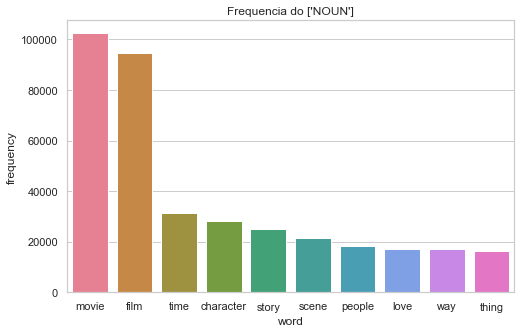

In [299]:
visualizacao01("[\'NOUN\']")

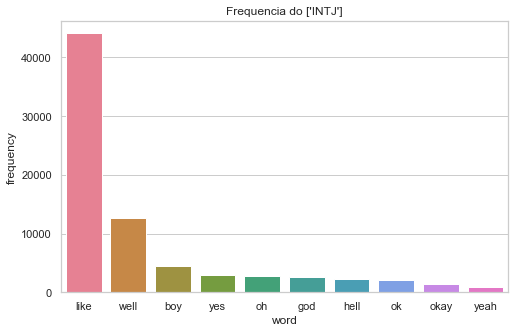

In [300]:
visualizacao01("[\'INTJ\']")

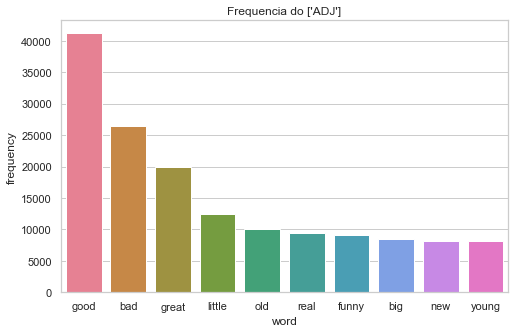

In [301]:
visualizacao01("[\'ADJ\']")

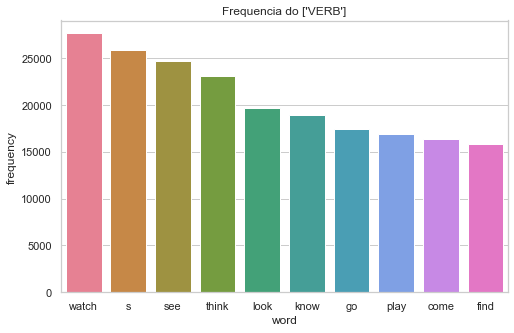

In [302]:
visualizacao01("[\'VERB\']")

##### Mostra as dependencias

In [82]:
text = str(df_train['text'][1])
doc = nlp(text)
displacy.render(doc, style="ent",jupyter=True)